데이터 시각화 양식

양식의 순서는 지키되 참고만 하고 자유롭게 더하거나 빼서 분석하세요.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'

In [4]:
# 파일 불러오기
df = pd.read_csv('2022-06-29_last_bab.csv')
# dtype -> datetime으로 바꾸기 
df['completed_at'] = pd.to_datetime(df['completed_at'])

In [5]:
# 첫번째 열 드롭
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

## 날짜데이터 만들기

In [88]:
#year(연도) 컬럼 추가
df['Year'] = df['completed_at'].dt.year 

In [89]:
#month(월) 컬럼 추가
df['Month'] = df['completed_at'].dt.month

In [90]:
#day(일) 컬럼 추가
df['Day'] = df['completed_at'].dt.day

In [91]:
#hour(시간)컬럼추가
df['Hour'] = df['completed_at'].dt.hour

In [92]:
df['Weekday'] = df['completed_at'].dt.day_name()

In [108]:
df['m-d'] = df['completed_at'].dt.strftime('%m%d')

# 매출 분석

In [7]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND'], dtype=object)

In [8]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

총매출 구하기 : type = payment & refund / state = completed

In [109]:
# payment & completed
pay_com = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]
pay_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,m-d
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,Sunday,0328
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15,Sunday,0328
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15,Sunday,0328
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,COMM,CARD,부동산/금융,2020-11-27 00:00:00,2021,3,28,15,Sunday,0328
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,COMM,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,15,Sunday,0328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101094,1364969,669238,204286,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,...,INICIS,CARD,디자인툴,2021-04-23 00:00:00,2021,9,25,13,Saturday,0925
101095,1364976,384003,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,...,KAKAO,CARD,영상 편집,2020-12-02 00:00:00,2021,9,25,13,Saturday,0925
101096,1364991,670891,203935,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,...,INICIS,CARD,백엔드 개발,2021-05-31 00:00:00,2021,9,25,14,Saturday,0925
101099,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,INICIS,VBANK,영상 편집,2021-06-15 00:00:00,2021,9,25,14,Saturday,0925


In [110]:
# refund & completed
re_com = df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]
re_com

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,m-d
645,972377,444760,204122,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,...,COMM,VBANK,마케팅,2018-11-11 00:00:00,2021,3,29,9,Monday,0329
646,972381,472666,203178,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,...,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021,3,29,9,Monday,0329
660,972409,447177,203989,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,...,COMM,CARD,일러스트,2021-02-19 00:00:00,2021,3,29,9,Monday,0329
666,972422,373915,204264,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,...,COMM,VBANK,데이터사이언스,2021-03-08 00:00:00,2021,3,29,9,Monday,0329
669,972436,456086,300000,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 09:47:17,-299000,...,COMM,CARD,프로그래밍,2018-11-11 00:00:00,2021,3,29,9,Monday,0329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,...,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00,2021,9,24,14,Friday,0924
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,...,INICIS,CARD,마케팅,2018-11-11 00:00:00,2021,9,24,14,Friday,0924
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,...,NAVER,CARD,영상 편집,2021-08-17 00:00:00,2021,9,24,16,Friday,0924
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,...,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00,2021,9,24,17,Friday,0924


In [111]:
com_Pay_Re = pd.concat([pay_com,re_com])
com_Pay_Re

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,m-d
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,COMM,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,Sunday,0328
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15,Sunday,0328
8,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15,Sunday,0328
10,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,COMM,CARD,부동산/금융,2020-11-27 00:00:00,2021,3,28,15,Sunday,0328
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,COMM,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,15,Sunday,0328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100866,1363708,600073,206065,REFUND,COMPLETED,(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,프로그래밍,올인원,2021-09-24 14:34:50,-149000,...,NAVER,CARD,백엔드 개발,2021-07-15 00:00:00,2021,9,24,14,Friday,0924
100870,1363721,645911,300000,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,...,INICIS,CARD,마케팅,2018-11-11 00:00:00,2021,9,24,14,Friday,0924
100895,1363934,506356,206720,REFUND,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-24 16:10:55,-259000,...,NAVER,CARD,영상 편집,2021-08-17 00:00:00,2021,9,24,16,Friday,0924
100933,1364149,604077,205569,REFUND,COMPLETED,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,업무 생산성,올인원,2021-09-24 17:09:30,-109000,...,KAKAO,POINT,엑셀/VBA,2021-08-17 00:00:00,2021,9,24,17,Friday,0924


In [17]:
#총매출
com_Pay_Re['transaction_amount'].sum()

5972719534

총 매출 = 5,972,719,534원

## 시간대, 요일, 일, 주, 월, 분기, 총 매출(반기), 6개월간 추이

In [85]:
# df

### 시간대별 매출 그래프

시간대별 count 그래프 (데이터 프레임 = df , 모든 이용의 카운트)

<AxesSubplot:xlabel='Hour', ylabel='count'>

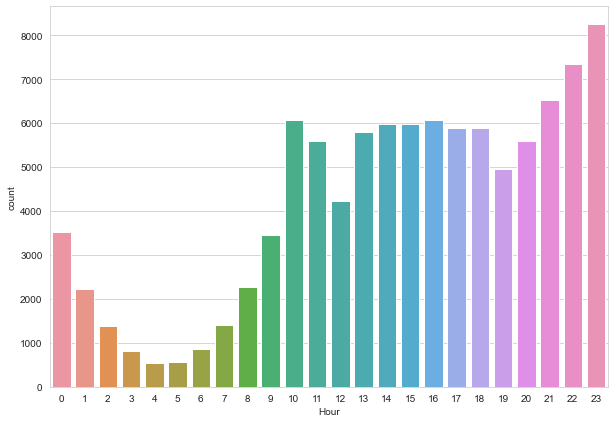

In [51]:
# 매출 그래프 아니에요..!!! 이 그래프로도 정보얻을 수 있을 것 같아서 남겨뒀어요..
# 시간대별로 count해서 언제 사람들이 가장 많이 이용하는 지 알아볼 수 있어요!
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Hour")

시간대별 그래프 (데이터프레임 : com_Pay_Re, 결제완료 및 환불 완료 된 데이터로 만들어짐)

<AxesSubplot:xlabel='Hour', ylabel='count'>

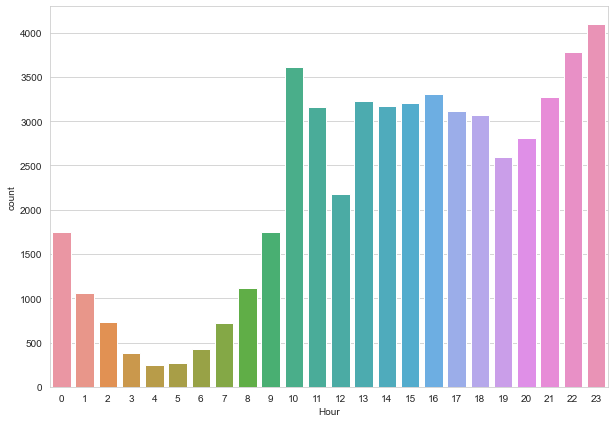

In [100]:
# 매출 그래프 아니에요..!!! 이 그래프로도 정보얻을 수 있을 것 같아서 남겨뒀어요..
# 위 그래프랑 다른 이유는 데이터프레임을 (com_Pay_Re)를 사용했기 때문입니다..!
# 위랑 다른 정보 : 이 그래프는 payment,refund가 completed인 데이터로만 만들어졌습니다.
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=com_Pay_Re, x="Hour")

시간대별 그래프 (매출 합으로 만들기) -> 이게 1번에서 구하고자 했던 것!

In [59]:
# 시간대별로 매출 합 구하기
sum_hour = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
sum_hour

,transaction_amount
completed_at,
0,233549455
1,136075550
2,95817755
3,52194135
4,33338600
5,36766265
6,55248680
7,94951875
8,155896900


<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

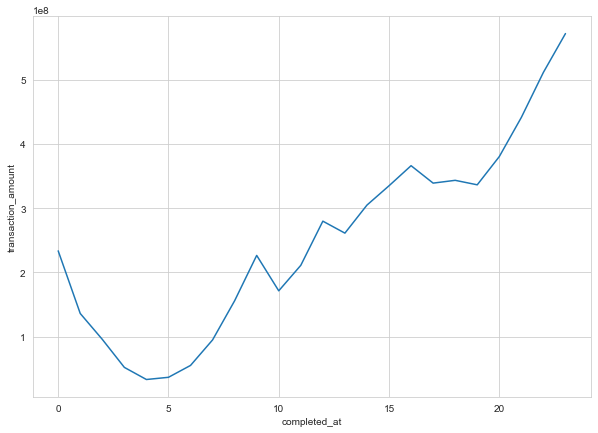

In [60]:
# 시간대별로 매출 그래프 그리기
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.lineplot(data=sum_hour, x="completed_at", y ='transaction_amount')

### 요일별 매출 그래프

요일별 그래프 (데이터 = df, 요일별로 조건 없이 이용자 수 구하기)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

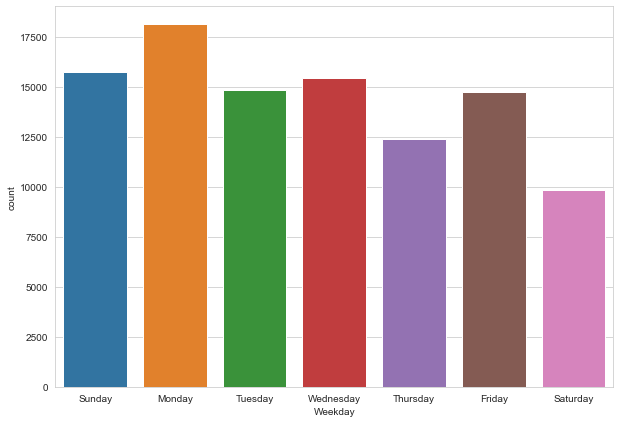

In [96]:
# 요일별로 카운트 그래프
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Weekday")

요일별 그래프 (data = com_Pay_Re, 결제 완료 및 환불 완료 강좌의 데이터만 사용아여 count)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

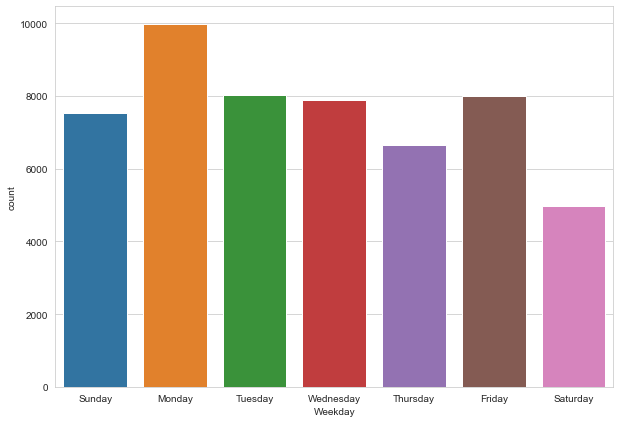

In [103]:
# 요일별로 카운트 그래프
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=com_Pay_Re, x="Weekday")

In [62]:
# 요일별 매출 총합 구하기
# 인덱스 정렬이 안되네요..ㅠㅜ
sum_week = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.day_name()).sum()[['transaction_amount']]
sum_week.sort_index(ascending=True)

,transaction_amount
completed_at,
Friday,819967968
Monday,794476420
Saturday,737461545
Sunday,1149664615
Thursday,708513498
Tuesday,859965425
Wednesday,902670063


인덱스 정렬 다시...

<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

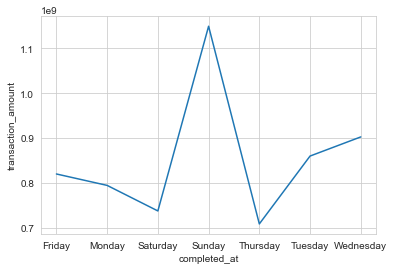

In [63]:
sns.lineplot(data=sum_week, x='completed_at', y='transaction_amount')

### 일별 매출 그래프

<AxesSubplot:xlabel='Day', ylabel='count'>

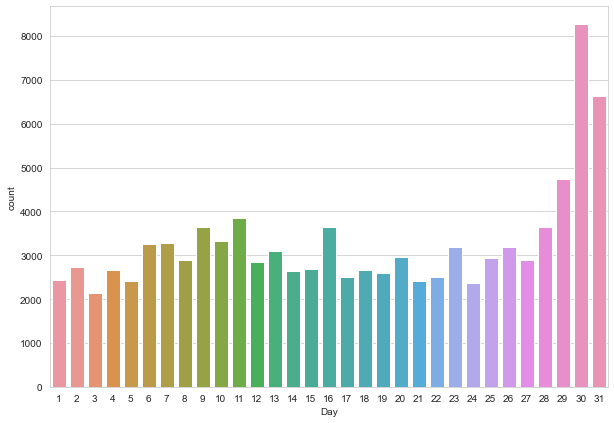

In [104]:
# count그래프
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Day")

일별 그래프 (data = com_Pay_Re)

<AxesSubplot:xlabel='Day', ylabel='count'>

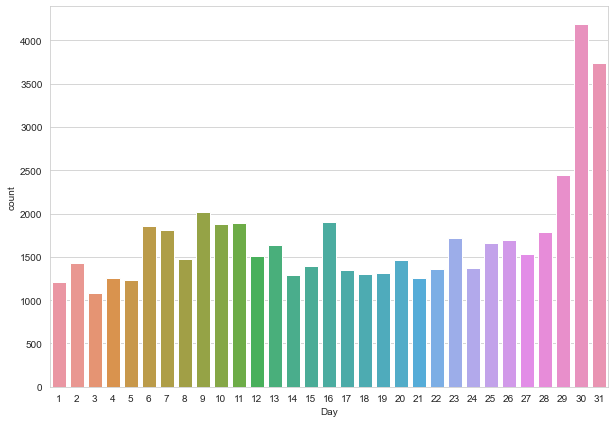

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=com_Pay_Re, x="Day")

일별 매출 그래프 그리기 </br>
아직 월별로 나누기 할려고 했는데 왜 안했지...ㅠㅜ

In [65]:
sum_day = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.day).sum()[['transaction_amount']]
sum_day.sort_index(ascending=True)

,transaction_amount
completed_at,
1,120656529
2,136319725
3,132405593
4,178228365
5,141387104
6,165539322
7,154945359
8,165210479
9,177890909


<AxesSubplot:xlabel='completed_at', ylabel='transaction_amount'>

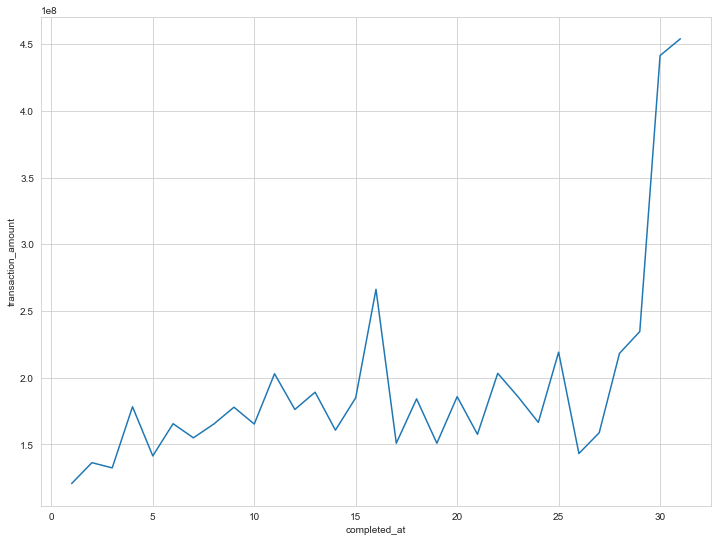

In [66]:
plt.figure(figsize=(12,9))
sns.lineplot(data=sum_day, x='completed_at', y='transaction_amount')

월말에 매출이 올라가는 걸로 봐서 월말에 끝나는 이벤트가 많을듯?!

<AxesSubplot:xlabel='Month', ylabel='count'>

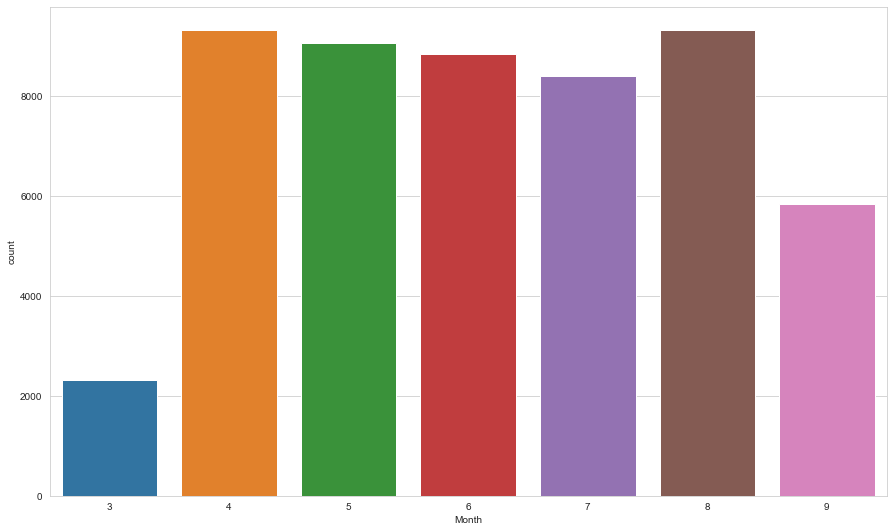

In [116]:
plt.figure(figsize=(15,9))
sns.countplot(data=com_Pay_Re, x="Month")

### 주별 매출 그래프

In [69]:
# df['day_of_week'] = df['completed_at'].dt.week

In [70]:
#주별 매출 (sum) 구하기
sum_sweek = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.week).sum()[['transaction_amount']]
sum_sweek.sort_index(ascending=True)

/var/folders/mb/9mp8sm994p9c0708gn3gmss40000gn/T/ipykernel_26114/4071369556.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sum_sweek = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.week).sum()[['transaction_amount']]


,transaction_amount
completed_at,
12,36101770
13,280902095
14,174836172
15,180461592
16,172120121
17,283422726
18,178097029
19,209188129
20,184205414


In [71]:
plt.figure(figsize=(10,7))
sns.countplot(data=sum_sweek, x="completed_at", y)
# sns.countplot(data=df, x="day_of_week")

SyntaxError: positional argument follows keyword argument (3974353985.py, line 2)

### 월별 매출 그래프

In [72]:
#make year&month cols 
df['month_year'] = pd.to_datetime(df['completed_at']).dt.to_period('M')

In [73]:
# df

<AxesSubplot:xlabel='month_year', ylabel='count'>

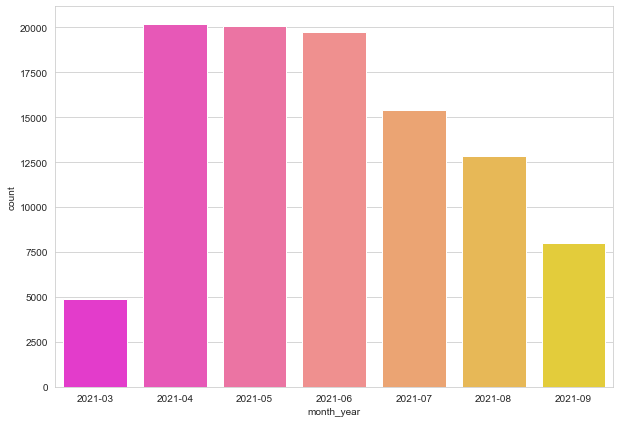

In [89]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
plt.xticks(rotation = 0)
sns.countplot(data=df, x='month_year', palette='spring')

### 분기별 매출 그래프

In [90]:
df['quarter'] = df['completed_at'].dt.to_period('Q')

In [91]:
sum_quart = com_Pay_Re.set_index('completed_at').groupby(lambda date: date.to_period('Q')).sum()[['transaction_amount']]
sum_quart.sort_index(ascending=True)

,transaction_amount
completed_at,
2021Q1,192480994
2021Q2,2747800161
2021Q3,3032438379


In [92]:
# plt.figure(figsize=(10,7))
# sns.lineplot(data=sum_quart, x="completed_at")

### 6개월(반기) 총매출 그래프

# 강의 분석

## 전체 강의 수

In [93]:
len(df['course_title'].unique())

610

## 전체 카테고리 수

In [94]:
len(df['category_title'].unique())

14

## 가장많은(적은) 매출을 올린 강의 및 탑 10강의 매출추이

### 매출 상위 1~10위 까지의  강의  목록 

In [95]:
# course_title 확인하기
# course_title =  df['course_title'].unique()
# course_title

In [54]:
#강의 리스트에서 가장 많은 매출 순으로 정렬 (10위까지)
sum_cour_list = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['course_title'])
x = sum_cour_list.sum()
course_title_desc = x.sort_values(ascending=False)
co_10 = course_title_desc.head(10)
co_10

course_title
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법           151049741
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                      141248845
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략    129821723
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                      116614335
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터           108576441
나의 칼퇴치트키 엑셀유치원                                    88201167
초격차 패키지 : 한번에 끝내는 디자인 툴                           87700764
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                   84763815
올인원 패키지 : 완전정복 시각디자인 기초                           82131657
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                       80602968
Name: transaction_amount, dtype: int64

In [55]:
#for문으로 만들다가 어려워서(방법찾다가 시간 많이 걸림..)... 그냥 노가다..
a1 = com_Pay_Re[(com_Pay_Re['course_title'] == 'The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법') & (com_Pay_Re['Month'])]
a2 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발') & (com_Pay_Re['Month'])]
a3 = com_Pay_Re[(com_Pay_Re['course_title'] == '올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략') & (com_Pay_Re['Month'])]
a4 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집') & (com_Pay_Re['Month'])]
a5 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터') & (com_Pay_Re['Month'])]
a6 = com_Pay_Re[(com_Pay_Re['course_title'] == '나의 칼퇴치트키 엑셀유치원') & (com_Pay_Re['Month'])]
a7 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 디자인 툴') & (com_Pay_Re['Month'])]
a8 = com_Pay_Re[(com_Pay_Re['course_title'] == '올인원 패키지 : star741의 캐주얼 일러스트 드로잉') & (com_Pay_Re['Month'])]
a9 = com_Pay_Re[(com_Pay_Re['course_title'] == '올인원 패키지 : 완전정복 시각디자인 기초') & (com_Pay_Re['Month'])]
a10 = com_Pay_Re[(com_Pay_Re['course_title'] == '초격차 패키지 : 한번에 끝내는 UX/UI 디자인') & (com_Pay_Re['Month'])]

In [57]:
top10 = pd.concat([a1, a2, a3, a4, a5, a6,a7,a8,a9,a10])
top10

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour
64887,1184847,579669,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 00:44:11,149000,...,0,149000,INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,0
64896,1184895,579641,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 01:39:14,149000,...,0,149000,KAKAO,POINT,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,1
64897,1184899,579743,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 01:45:48,149000,...,0,149000,NAVER,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,1
64903,1184912,579749,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 01:57:34,149000,...,0,149000,KAKAO,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,1
64914,1184982,573472,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-07-01 04:48:54,149000,...,0,149000,INICIS,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94735,1330996,634463,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-06 14:10:04,-141000,...,0,171000,INICIS,CARD,UX/UI,2020-12-18 00:00:00,2021,9,6,14
95349,1333631,652568,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-07 11:00:12,-156000,...,0,176000,INICIS,CARD,UX/UI,2020-12-18 00:00:00,2021,9,7,11
96609,1339069,658585,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-10 10:35:09,-156000,...,0,176000,KAKAO,POINT,UX/UI,2020-12-18 00:00:00,2021,9,10,10
98876,1349489,662544,203523,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-09-16 13:26:03,-156000,...,0,176000,INICIS,CARD,UX/UI,2020-12-18 00:00:00,2021,9,16,13


In [ ]:
dic_list = []
for i in co_10:
    dic_list.append(df['course_title'] == i)

### 매출 상위 1~10위 강의 매출 추이 그래프(6개월간)

1강의 당 월간 매출 구해서 한 그래프에 10개의 그래프 보여주면 될듯?!!!

사용가능 그래프 : displot, lineplot, pointplot </br>
x축 : Month / y축 : transaction / hue: 강의명 

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3

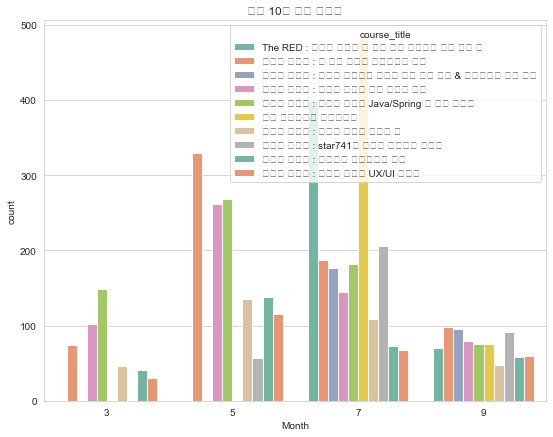

In [58]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = top10, x='Month', hue='course_title', palette='Set2')
plt.title('순위 10위 강의 그래프')
plt.show()

### 매출 하위 1~10위 강의목록

In [160]:
#강의 리스트에서 가장 많은 매출 (오름차)순으로 정렬 (10위까지)
sum_cour_list = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['course_title'])
x = sum_cour_list.sum()
course_title_desc = x.sort_values(ascending=True)
co_10 = course_title_desc.head(10)
co_10

course_title
프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스)                            -1400000
프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)   -1399000
모션그래픽 포트폴리오 온라인 완주반 1기                                      -1144000
코딩+알고리즘 온라인 완주반 5기                                           -810000
디지털 마케팅 온라인 완주반 3기                                           -575000
매주)브런치로 책 출판 온라인 완주반                                         -520000
매주)컴퓨터 공학 전공자 따라잡기 온라인 완주반                                   -380000
브런치로 책 출판 온라인 완주반 3기                                         -360000
건축/공간 디자인 실무 완성 온라인 완주반 1기                                   -334800
프로모션 :개강 전 필수 마스터 코딩 한끝세트 (3월 프리패스)                          -299000
Name: transaction_amount, dtype: int64

### 매출 하위 1~10위 강의 매출 추이 그래프(6개월간)

In [161]:
b1 = com_Pay_Re[(com_Pay_Re['course_title'] == '프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스)') & (com_Pay_Re['Month'])]
b2 = com_Pay_Re[(com_Pay_Re['course_title'] == '프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)') & (com_Pay_Re['Month'])]
b3 = com_Pay_Re[(com_Pay_Re['course_title'] == '모션그래픽 포트폴리오 온라인 완주반 1기') & (com_Pay_Re['Month'])]
b4 = com_Pay_Re[(com_Pay_Re['course_title'] == '코딩+알고리즘 온라인 완주반 5기') & (com_Pay_Re['Month'])]
b5 = com_Pay_Re[(com_Pay_Re['course_title'] == '디지털 마케팅 온라인 완주반 3기') & (com_Pay_Re['Month'])]
b6 = com_Pay_Re[(com_Pay_Re['course_title'] == '매주)브런치로 책 출판 온라인 완주반') & (com_Pay_Re['Month'])]
b7 = com_Pay_Re[(com_Pay_Re['course_title'] == '매주)컴퓨터 공학 전공자 따라잡기 온라인 완주반') & (com_Pay_Re['Month'])]
b8 = com_Pay_Re[(com_Pay_Re['course_title'] == '브런치로 책 출판 온라인 완주반 3기') & (com_Pay_Re['Month'])]
b9 = com_Pay_Re[(com_Pay_Re['course_title'] == '건축/공간 디자인 실무 완성 온라인 완주반 1기') & (com_Pay_Re['Month'])]
b10 = com_Pay_Re[(com_Pay_Re['course_title'] == '프로모션 :개강 전 필수 마스터 코딩 한끝세트 (3월 프리패스)') & (com_Pay_Re['Month'])]

In [ ]:
pd.concat

In [162]:
tail10 = pd.concat([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10])
com1 = tail10[['course_title','transaction_amount','Month']]
com1_sum = com1.set_index('Month')
com1_sum.sort_index(ascending=True)
bi = com1_sum.groupby('Month')
bi['course_title']

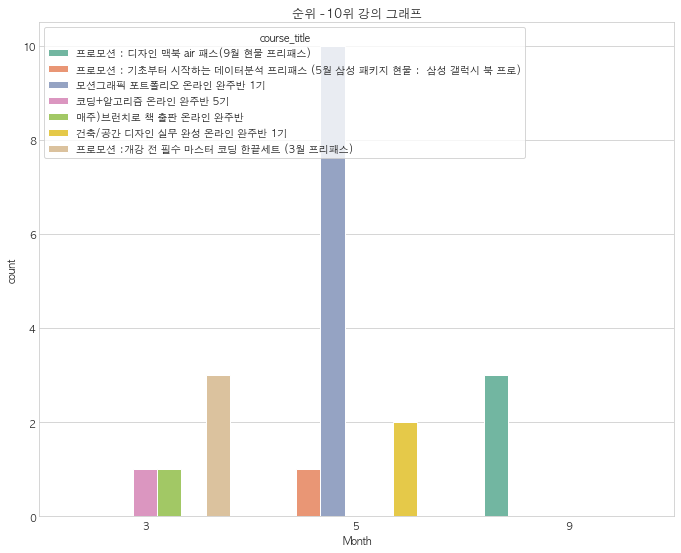

In [166]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = tail10, x='Month', hue='course_title', palette='Set2')
plt.title('순위 -10위 강의 그래프')
plt.show()

## 가장많은(적은) 매출을 올린 카테고리 탑 10카테고리 매출추이

### 매출 상위 1~10위 까지의  카테고리  목록

In [229]:
# 데이터 사이언스 띄어쓰기 0,x 합쳐주기
# com_Pay_Re.replace('데이터 사이언스','데이터사이언스', inplace=True)

In [228]:
# com_Pay_Re[com_Pay_Re['category_title'] == '데이터사이언스']

In [230]:
#카테고리에서 가장 많은 매출 순으로 정렬 (10위까지)
cate_list = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['category_title'])
cl = cate_list.sum()
c1_1= cl.sort_values(ascending=False)
cate_d = c1_1.head(10)
cate_d

category_title
프로그래밍      1650488541
데이터사이언스     950073852
디자인         663196168
마케팅         587623324
업무 생산성      572358665
영상/3D       544706205
부동산/금융      471074334
투자/재테크      277706420
크리에이티브      240873160
비즈니스          5029865
Name: transaction_amount, dtype: int64

In [231]:
c1 = com_Pay_Re[(com_Pay_Re['category_title'] == '프로그래밍') & (com_Pay_Re['Month'])]
c2 = com_Pay_Re[(com_Pay_Re['category_title'] == '데이터사이언스') & (com_Pay_Re['Month'])]
c3 = com_Pay_Re[(com_Pay_Re['category_title'] == '디자인') & (com_Pay_Re['Month'])]
c4 = com_Pay_Re[(com_Pay_Re['category_title'] == '마케팅') & (com_Pay_Re['Month'])]
c5 = com_Pay_Re[(com_Pay_Re['category_title'] == '업무 생산성') & (com_Pay_Re['Month'])]
c6 = com_Pay_Re[(com_Pay_Re['category_title'] == '영상/3D') & (com_Pay_Re['Month'])]
c7 = com_Pay_Re[(com_Pay_Re['category_title'] == '부동산/금융') & (com_Pay_Re['Month'])]
c8 = com_Pay_Re[(com_Pay_Re['category_title'] == '투자/재테크') & (com_Pay_Re['Month'])]
c9 = com_Pay_Re[(com_Pay_Re['category_title'] == '크리에이티브') & (com_Pay_Re['Month'])]
c10 = com_Pay_Re[(com_Pay_Re['category_title'] == '비즈니스') & (com_Pay_Re['Month'])]

In [232]:
cate10 = pd.concat([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10])
cate10

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,CARD,프로그래밍,2021-03-04 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
14,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
22,970695,455311,203146,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,...,CARD,DevOps,2021-02-08 00:00:00,2021,3,28,15,Sunday,2021-03,2021Q1
40,970730,445723,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,...,CARD,프론트엔드 개발,2021-02-02 00:00:00,2021,3,28,16,Sunday,2021-03,2021Q1
57,970789,478098,300000,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 16:52:29,299000,...,CARD,프로그래밍,2018-11-11 00:00:00,2021,3,28,16,Sunday,2021-03,2021Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94024,1328425,31183,300000,PAYMENT,COMPLETED,프로모션 : MBA부터 HR까지 직장인 스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-05 01:29:50,330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,5,1,Sunday,2021-09,2021Q3
94040,1328486,194316,300000,PAYMENT,COMPLETED,프로모션 : 워라밸을 완성하는 직장인 필수스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-05 03:58:47,330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,5,3,Sunday,2021-09,2021Q3
94081,1328685,653629,300000,PAYMENT,COMPLETED,프로모션 : MBA부터 HR까지 직장인 스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-05 12:28:42,330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,5,12,Sunday,2021-09,2021Q3
94553,1330401,408034,300000,REFUND,COMPLETED,프로모션 : MBA부터 HR까지 직장인 스킬 벼락치기 패키지 (9월 프리패스),비즈니스,올인원,2021-09-06 11:24:48,-330000,...,CARD,비즈니스,2018-11-11 00:00:00,2021,9,6,11,Monday,2021-09,2021Q3


### 매출 상위 1~10위 카테고리 매출 추이 그래프(6개월간)

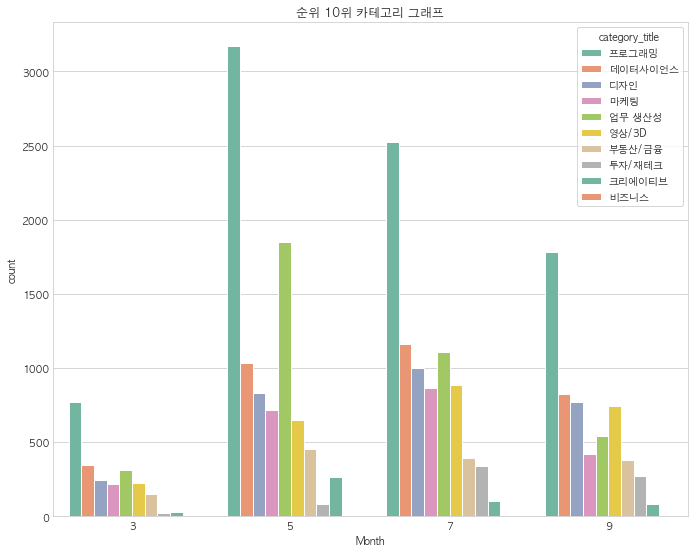

In [233]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = cate10, x='Month', hue='category_title', palette='Set2')
plt.title('순위 10위 카테고리 그래프')
plt.show()

### 매출 하위 1~10위 카테고리목록

In [234]:
#카테고리에서 가장 많은 매출 순으로 정렬 (10위까지)
cate_list2 = com_Pay_Re['transaction_amount'].groupby(com_Pay_Re['category_title'])
cl2 = cate_list2.sum()
c1_12= cl2.sort_values(ascending=True)
cate_d2 = c1_12.head(10)
cate_d2

category_title
파이낸스        4620000
지식콘텐츠       4969000
비즈니스        5029865
크리에이티브    240873160
투자/재테크    277706420
부동산/금융    471074334
영상/3D     544706205
업무 생산성    572358665
마케팅       587623324
디자인       663196168
Name: transaction_amount, dtype: int64

### 매출 하위 1~10위 카테고리 매출 추이 그래프(6개월간)

In [241]:
d1 = com_Pay_Re[(com_Pay_Re['category_title'] == '파이낸스') & (com_Pay_Re['Month'])]
d2 = com_Pay_Re[(com_Pay_Re['category_title'] == '지식콘텐츠') & (com_Pay_Re['Month'])]
d3 = com_Pay_Re[(com_Pay_Re['category_title'] == '비즈니스') & (com_Pay_Re['Month'])]
d4 = com_Pay_Re[(com_Pay_Re['category_title'] == '크리에이티브') & (com_Pay_Re['Month'])]
d5 = com_Pay_Re[(com_Pay_Re['category_title'] == '투자/재테크') & (com_Pay_Re['Month'])]
d6 = com_Pay_Re[(com_Pay_Re['category_title'] == '부동산/금융') & (com_Pay_Re['Month'])]
d7 = com_Pay_Re[(com_Pay_Re['category_title'] == '영상/3D') & (com_Pay_Re['Month'])]
d8 = com_Pay_Re[(com_Pay_Re['category_title'] == '업무 생산성') & (com_Pay_Re['Month'])]
d9 = com_Pay_Re[(com_Pay_Re['category_title'] == '마케팅') & (com_Pay_Re['Month'])]
d10 = com_Pay_Re[(com_Pay_Re['category_title'] == '디자인') & (com_Pay_Re['Month'])]

In [242]:
cate_tail10 = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10])
cate_tail10

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,month_year,quarter
93215,1323596,641485,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-01 14:04:44,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,1,14,Wednesday,2021-09,2021Q3
93380,1324639,121917,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-02 08:12:13,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,2,8,Thursday,2021-09,2021Q3
93712,1326538,546634,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-03 13:00:27,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,3,13,Friday,2021-09,2021Q3
93936,1327974,654322,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-04 16:04:50,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,4,16,Saturday,2021-09,2021Q3
94034,1328457,45825,300000,PAYMENT,COMPLETED,프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지 (9월 프리패스),파이낸스,올인원,2021-09-05 02:52:32,330000,...,CARD,파이낸스,2018-11-11 00:00:00,2021,9,5,2,Sunday,2021-09,2021Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100540,1360783,666751,204013,REFUND,COMPLETED,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-09-23 13:46:36,-164000,...,CARD,시각디자인,2021-03-16 00:00:00,2021,9,23,13,Thursday,2021-09,2021Q3
100550,1360833,667500,204871,REFUND,COMPLETED,올인원 패키지 : star741의 캐주얼 일러스트 드로잉,디자인,올인원,2021-09-23 14:00:58,-169000,...,CARD,일러스트,2021-05-25 00:00:00,2021,9,23,14,Thursday,2021-09,2021Q3
100574,1360973,55069,300000,REFUND,COMPLETED,프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스),디자인,올인원,2021-09-23 14:52:48,-1400000,...,CARD,디자인,2018-11-11 00:00:00,2021,9,23,14,Thursday,2021-09,2021Q3
100788,1363264,642002,300000,REFUND,COMPLETED,프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스),디자인,올인원,2021-09-24 10:57:42,-1400000,...,CARD,디자인,2018-11-11 00:00:00,2021,9,24,10,Friday,2021-09,2021Q3


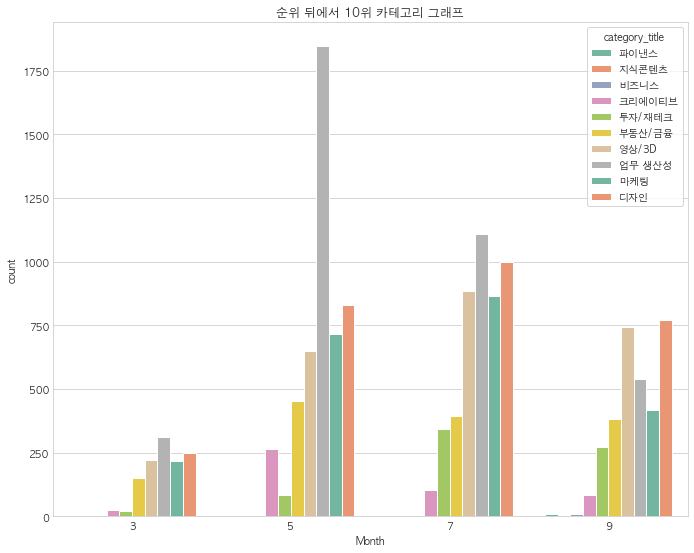

In [245]:
plt.figure(figsize=(9, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = cate_tail10, x='Month', hue='category_title', palette='Set2')
plt.title('순위 뒤에서 10위 카테고리 그래프')
plt.show()

# 수강 신청 행동 패턴 분석

## cancelled 가장 많은 강좌(구매가 많은게 환불이 많은가? 주의)

In [18]:
df['type'].unique()

array(['ORDER', 'PAYMENT', 'REFUND'], dtype=object)

In [19]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

타입은 order인데 state는 취소인 강좌 찾기

In [20]:
cc = df[(df['type'] == 'ORDER') & (df['state'] == 'CANCELLED')]

### 취소가 많은  1~20위 까지의  강의  목록(cancelled)

In [24]:
c1 = cc.groupby('course_title')['state']
c_sum = c1.count()
c_desc = c_sum.sort_values(ascending=False)
canc = c_desc.head(20)
canc

course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           1331
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                                            998
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                                 942
초격차 패키지 : 한번에 끝내는 디자인 툴                                                640
입만 열면 인정받는 스피치 10분컷                                                    620
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential     598
초격차 패키지 : 한 번에 끝내는 엑셀 실무                                               594
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin                       573
올인원 패키지 : 완전정복 시각디자인 기초                                                539
초격차 패키지 : 한번에 끝내는 PPT 제작/디자인                                           512
초격차 패키지 : 한번에 끝내는 모션그래픽                                                499
올인원 패키지 : 디지털 마케팅 MAX 2020                                             487
초격차 패키지 : 한 번에 끝내는 데이터 분석 툴                                            485
초격차 패키지 : 한번

In [45]:
# 거의 성공한 듯 하나 더 만질 수 있는 시간이 없어서... 그냥 넘어갈게요.ㅠㅜㅠㅜ
# f1_list = []
# for i in canc.index:
#     f1 = cc[(cc['course_title'] == i) & (cc['Month'])]
#     print(f1[f1['course_title']])

In [46]:
e1= cc[(cc['course_title'] == '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발') & (cc['Month'])]
e2= cc[(cc['course_title'] == '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집') & (cc['Month'])]
e3= cc[(cc['course_title'] == '초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터') & (cc['Month'])]
e4= cc[(cc['course_title'] == '초격차 패키지 : 한번에 끝내는 디자인 툴') & (cc['Month'])]
e5= cc[(cc['course_title'] == '입만 열면 인정받는 스피치 10분컷') & (cc['Month'])]

In [47]:
cantop10 = pd.concat([e1,e2,e3,e4,e5])

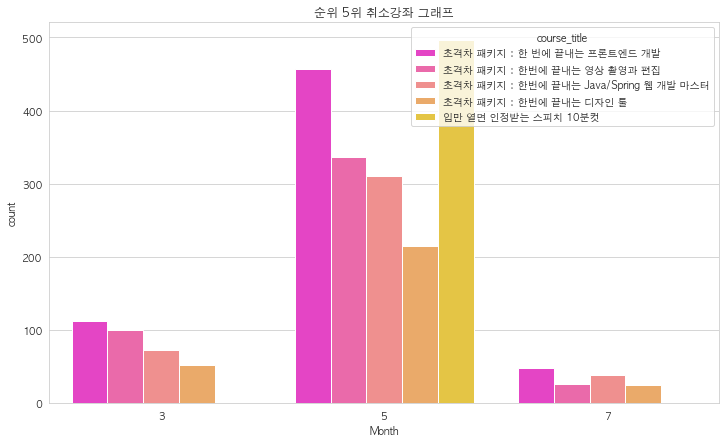

In [66]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(12, 7))
# plt.xticks(rotation = -90)
sns.countplot(data = cantop10, x='Month', hue='course_title', palette='spring')
plt.title('순위 5위 취소강좌 그래프')
plt.show()

### 취소가 가장 적은 1~20위 강의 목록

In [471]:
c1 = cc.groupby('course_title')['state']
c_sum = c1.count()
c_desc = c_sum.sort_values(ascending=True)
c_desc.head(20)

course_title
(test)프로모션 강의 페이지                                            1
[한정판매] 딥러닝 끝장 패키지(~5월)                                       1
[한정판매] 자연어 A-Z 끝장 패키지(~7월)                                   1
데이터분석 프로젝트+자격증 온라인 완주반 2기                                    1
매주)서비스 기획서 완성 온라인 완주반                                        1
스프링 아카데미아 강의 5 - Spring Security 인증 커스텀을 통한 서비스 구축           1
스프링 아카데미아 강의 8 - Spring Security를 통한 MFA 구현                  1
승인받는 이모티콘 만들기 온라인 완주반 1기                                     1
엑셀 온라인 완주반 3기                                                1
프로모션 : 풀스택 마케터를 위한 마케팅 프리패스 (5월 삼성 패키지 현물 :  삼성노트북 플러스2)     1
프로모션 : 풀스택 마케터를 위한 마케팅 프리패스 (5월 삼성 패키지 현물 :  삼성 갤럭시 북 프로)    1
프로모션 : 딥러닝 A to Z까지 한 번에 마스터하는 iPad 패키지 (7월 현물 프리패스)         1
올인원 패키지 : 1인 쇼핑몰 시작하기 (2020)                                 1
프로모션 : 풀스택 데이터 사이언티스트를 위한 필수 iPad 패키지 (7월 현물 프리패스)           1
프로모션 : 데이터 분석 A to Z 평생 PASS (10월)                           1
프로모션 : 데이터 보는 눈을 바꿔 줄 데이터 마케팅 한끝세트 (3월 프리패

### 환불이 많은  1~20위 까지의  강의  목록(refund)

type이 refund이면서 state는 completed인 것

In [474]:
rc = df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]

In [481]:
rc1 = rc.groupby('course_title')['type']
rc_c = rc1.count()
rc_a = rc_c.sort_values(ascending=False)
rcc = rc_a.head(20)
rcc

course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                           121
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                                105
초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                                     68
올인원 패키지 : star741의 캐주얼 일러스트 드로잉                                        65
초격차 패키지 : 한번에 끝내는 디자인 툴                                                64
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin                       63
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                                            60
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                                 57
올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리미어프로 베이직                 55
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential     53
초격차 패키지 : 한번에 끝내는 모션그래픽                                                50
초격차 패키지 : 한번에 끝내는 UX/UI 디자인                                            50
초격차 패키지 : 한번에 끝내는 PPT 제작/디자인                                           50
올인원 패키지 : 박세익 전무에게 배우는 주식

### 환불률이 가장 적은 1~20위 강의 목록

In [482]:
rc1 = rc.groupby('course_title')['type']
rc_c = rc1.count()
rc_a = rc_c.sort_values(ascending=True)
rcc = rc_a.head(20)
rcc

course_title
(test)프로모션 강의 페이지                                    1
프로모션 : 온라인 창업 될 때 까지 무제한 패스 (4월 프리패스)                1
올인원 패키지 : 콘텐츠 마케팅                                    1
프로모션 : 영알못도 완성하는 영상편집 무제한 99패스 (5월 프리패스)             1
올인원 패키지 : 파이썬을 활용한 시계열 데이터 분석 A-Z                    1
프로모션 : 영상그래픽 디자인 맥북 pro 패스(9월 현물 프리패스)               1
제품 디자인 포트폴리오 온라인 완주반 2기                              1
프로모션 : 영상 퀄리티를 바꿔 줄 영상 제작 스킬 무제한 99패스 (5월 프리패스)      1
프로모션 : 유튜버 따라잡고 실버버튼 받는 영상 평생 PASS (8월 프리패스)         1
프로모션 : 영상 퀄리티를 높이는 전문가 편집스킬 벼락치기 패키지 (9월 프리패스)       1
프로모션 : 연봉 앞자리가 바뀌는 앱개발 무제한 패스 (4월 프리패스)              1
초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영 v.1 (폐강)    1
프로모션 : 연봉 앞자리가 바뀌는 앱개발 iPad 패키지 (7월 현물 프리패스)         1
프로모션 : 아이패드 200%활용 드로잉 만랩 iPad 패키지 (7월 현물 프리패스)      1
프로모션 : 시장의 흐름을 읽는 투자의 정석 평생 PASS  (8월 프리패스)          1
프로모션 : 시장의 흐름을 읽는 투자의 정석 벼락치기 패키지  (9월 프리패스)         1
프로모션 : 비전공자를 위한 데이터 분석 왕초보 입문 무한패스 (9월 프리패스)         1
프로모션 : 영상 퀄리티를 높이는 전문가 편집스킬 PASS (7월 프리패스)          

### 구매 & 환불의 상관관계

In [125]:
tt = com_Pay_Re.groupby('type')['transaction_amount']


In [124]:
com_Pay_Re[(com_Pay_Re['type'] == 'PAYMENT')&(com_Pay_Re['transaction_amount'])]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Weekday,m-d
124,971033,386368,201582,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터 공학 전공 필수,프로그래밍,올인원,2021-03-28 18:55:04,119225,...,COMM,CARD,개발자 커리어,2019-09-30 00:00:00,2021,3,28,18,Sunday,0328
385,971708,77799,203047,PAYMENT,COMPLETED,올인원 패키지 : 파이썬을 활용한 시계열 데이터 분석 A-Z,데이터사이언스,올인원,2021-03-28 22:53:32,182875,...,COMM,CARD,데이터분석,2020-08-21 00:00:00,2021,3,28,22,Sunday,0328
12006,1006508,178328,200543,PAYMENT,COMPLETED,올인원 패키지 : 프론트엔드 (React),프로그래밍,올인원,2021-04-12 13:30:52,135375,...,INICIS,CARD,프로그래밍,2019-04-19 00:00:00,2021,4,12,13,Monday,0412
12127,1006965,107437,202614,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터비전과 딥러닝,데이터사이언스,올인원,2021-04-12 16:45:21,153425,...,INICIS,VBANK,딥러닝/인공지능,2020-05-20 00:00:00,2021,4,12,16,Monday,0412
12453,1008227,85533,201520,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-04-13 13:01:26,103075,...,INICIS,CARD,DevOps,2018-11-11 00:00:00,2021,4,13,13,Tuesday,0413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52906,1142584,463149,204774,PAYMENT,COMPLETED,기초 회화부터 비즈니스 영어 10분컷,업무 생산성,하루10분컷,2021-06-15 00:50:30,23655,...,KAKAO,CARD,업무 생산성,2021-04-28 00:00:00,2021,6,15,0,Tuesday,0615
53300,1144064,554151,205314,PAYMENT,COMPLETED,일상을 담는 아이패드 드로잉 10분컷,업무 생산성,하루10분컷,2021-06-15 20:57:29,23655,...,INICIS,CARD,업무 생산성,2021-05-14 00:00:00,2021,6,15,20,Tuesday,0615
53616,1145264,105594,205314,PAYMENT,COMPLETED,일상을 담는 아이패드 드로잉 10분컷,업무 생산성,하루10분컷,2021-06-16 15:35:20,23655,...,INICIS,CARD,업무 생산성,2021-05-14 00:00:00,2021,6,16,15,Wednesday,0616
55161,1151641,21745,205314,PAYMENT,COMPLETED,일상을 담는 아이패드 드로잉 10분컷,업무 생산성,하루10분컷,2021-06-19 21:01:48,23655,...,INICIS,CARD,업무 생산성,2021-05-14 00:00:00,2021,6,19,21,Saturday,0619


# PG사 목록

## 기존 PG사 vs 신규 pg사 점유율 현황

In [121]:
df['pg'].unique()

array(['COMM', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

### 기존 PG사 vs 신규 pg사 기간별 점유율 변동 변화추이

기존 : 이니시스 
신규 : 카카오, 네이버, 페이코, 차이..?

In [98]:
pig1 = df.set_index('completed_at').groupby(lambda date: date.month).count()[['pg']]
pig1.sort_index(ascending=True)

,pg
completed_at,
3,4906
4,20163
5,20055
6,19747
7,15380
8,12853
9,7998


In [99]:
pig = df[df['pg'] != 'INICIS']
pigs = pig.groupby('pg')['method']
pigs.count()

pg
CHAI       321
COMM     12243
KAKAO    17138
NAVER     7979
PAYCO     4609
Name: method, dtype: int64

# VIP그룹 분석

## VIP 그룹 정의

In [100]:
com_Pay_Re.describe()['transaction_amount']

count    5.304000e+04
mean     1.126078e+05
std      1.335663e+05
min     -1.800000e+06
25%      7.900000e+04
50%      1.160000e+05
75%      1.550000e+05
max      1.800000e+06
Name: transaction_amount, dtype: float64

vip 그룹 정의 </br>
id를 transaction_amount와 그룹.(id중복제거) </br>
id에서 가장 많은 금액 10%찾아보기

In [559]:
idt = com_Pay_Re.groupby('id')['transaction_amount']
idts = idt.sum()
idtsv = idts.sort_values(ascending=False)
#10%내
idtsv.quantile(0.9)

220000.0

In [560]:
# 위의 결과 맞는지 확인용
# idtsv.describe()

## 일반 고객 평균 결제 횟수 vs VIP 고객 평균 결제 횟수

## VIP 그룹 특징

# 쿠폰 사용 분석

## 전체구매건 중 쿠폰사용한 구매비율

## 매출에 대한 쿠폰의 중요도 분석

# 패키지 강의 vs 단품 강의

In [99]:
# df

In [79]:
df[df['course_title'].str.contains('패키지')]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour
0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,...,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00,2021,3,28,15
1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,...,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00,2021,3,28,15
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15
5,970655,478028,201797,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,...,0,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00,2021,3,28,15
7,970664,460730,200622,ORDER,CANCELLED,올인원 패키지 : 기업가치 평가와 M&A 전략 실무,부동산/금융,올인원,2021-03-28 15:25:42,112500,...,0,122500,COMM,CARD,금융/투자 실무,2019-05-02 00:00:00,2021,3,28,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101094,1364969,669238,204286,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,...,20000,232000,INICIS,CARD,디자인툴,2021-04-23 00:00:00,2021,9,25,13
101095,1364976,384003,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,...,0,149000,KAKAO,CARD,영상 편집,2020-12-02 00:00:00,2021,9,25,13
101096,1364991,670891,203935,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,...,20000,179000,INICIS,CARD,백엔드 개발,2021-05-31 00:00:00,2021,9,25,14
101097,1364995,640697,205365,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,...,20000,116000,INICIS,TRANS,영상 편집,2021-06-15 00:00:00,2021,9,25,14


# 레드는 과연 성공했는가?

레드 강좌 : 6198개 </br>
레드 중 결제 완 : 3160개

In [73]:
#레드강좌 개수
red = df[df['course_title'].str.contains('RED')]
red[(red['type']=='PAYMENT') & (red['state'] == 'COMPLETED')]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour
22,970695,455311,203146,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 15:43:59,149500,...,0,149500,COMM,CARD,DevOps,2021-02-08 00:00:00,2021,3,28,15
35,970722,478064,204325,PAYMENT,COMPLETED,THE RED : 광고인 박웅현과 크리에이티브,마케팅,RED,2021-03-28 16:07:13,59000,...,0,59000,COMM,CARD,글쓰기/카피라이팅,2021-03-19 00:00:00,2021,3,28,16
76,970855,478132,203180,PAYMENT,COMPLETED,The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법,마케팅,RED,2021-03-28 17:29:10,125500,...,0,125500,COMM,CARD,글쓰기/카피라이팅,2020-11-04 00:00:00,2021,3,28,17
83,970886,478159,204325,PAYMENT,COMPLETED,THE RED : 광고인 박웅현과 크리에이티브,마케팅,RED,2021-03-28 17:56:03,59000,...,0,59000,COMM,CARD,글쓰기/카피라이팅,2021-03-19 00:00:00,2021,3,28,17
90,970927,478166,203146,PAYMENT,COMPLETED,The RED : 현실 세상의 TDD by 이규원,프로그래밍,RED,2021-03-28 18:10:49,149500,...,0,149500,COMM,CARD,DevOps,2021-02-08 00:00:00,2021,3,28,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101045,1364723,650609,203180,PAYMENT,COMPLETED,The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법,마케팅,RED,2021-09-25 04:46:20,132000,...,0,132000,PAYCO,POINT,글쓰기/카피라이팅,2020-11-04 00:00:00,2021,9,25,4
101046,1364724,650609,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-09-25 04:46:45,171000,...,0,171000,PAYCO,POINT,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,9,25,4
101056,1364756,490127,204670,PAYMENT,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-09-25 08:09:48,171000,...,0,171000,NAVER,CARD,글쓰기/카피라이팅,2021-06-18 17:00:00,2021,9,25,8
101063,1364785,670746,206814,PAYMENT,COMPLETED,The RED : 블리자드 라이팅 아티스트 : 이호성의 언리얼 엔진 라이팅,영상/3D,RED,2021-09-25 09:06:10,252000,...,0,252000,PAYCO,CARD,VFX,2021-09-13 00:00:00,2021,9,25,9


In [76]:
red_vc = red['course_title'].value_counts()
red_vc.head(10)

The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                        2124
THE RED : 광고인 박웅현과 크리에이티브                                      488
The RED : 현실 세상의 TDD by 이규원                                    419
The RED : 지브리 스튜디오 제작국장에게 듣는 스토리텔링 기획법                         389
The RED : 개발자로 살아남기 : 30년을 주도하는 9가지 필수 기술 by 박종천               316
The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기                     299
The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것              266
The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 MSA 구축 by 이희창     222
The RED : 백발의 개발자를 꿈꾸며 : 코드리뷰, 레거시와 TDD by 백명석, 최범균            188
The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redis by 강대명         184
Name: course_title, dtype: int64

In [77]:
red['transaction_amount'].sum()

921090963

총 결제 금액 : 5,972,719,534원 </br>
red 총 결제금액 : 921,090,964원

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (164, 2) + inhomogeneous part.

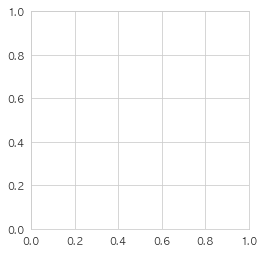

In [84]:
q = red['transaction_amount'].groupby(com_Pay_Re['transaction_amount'])
q.sum()
plt.pie(q)